In [6]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns

%matplotlib inline

In [7]:
import requests
import json
#import dataset as ds

def new_session(url):
    s=requests.Session()
    #r = s.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    r=s.get(url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'})
    
    print(r.status_code)
    print(s.cookies)
    return s,r

def dba_pred(words):
    url0='https://www.dba.dk/frontpage/Header/GetPredictiveSearch?searchWord='
#    words='lenovo+x240'
 
    url2='&sectionId=0'
    url=url0+words+url2   
    print(url)
    s,r=new_session(url)
    
    data = json.loads(r.text)
    return data
    
#data=dba_pred('lenovo+x240')

In [8]:
new_session('https://www.dba.dk/soeg/?soeg=oneplus+5')


SSLError: HTTPSConnectionPool(host='www.dba.dk', port=443): Max retries exceeded with url: /soeg/?soeg=oneplus+5 (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

In [3]:
dba_pred('damecykel')

https://www.dba.dk/frontpage/Header/GetPredictiveSearch?searchWord=damecykel&sectionId=0


SSLError: HTTPSConnectionPool(host='www.dba.dk', port=443): Max retries exceeded with url: /frontpage/Header/GetPredictiveSearch?searchWord=damecykel&sectionId=0 (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

In [5]:
dba_pred('iphone8+64gb')

https://www.dba.dk/frontpage/Header/GetPredictiveSearch?searchWord=iphone8+64gb&sectionId=0
200
<RequestsCookieJar[<Cookie dbatracker=id=c113f944-9c11-4a35-a1ed-cf557e57e4e0 for .www.dba.dk/>, <Cookie dbasession=id=927a03a4-583d-4483-a487-9779fcdbd478 for www.dba.dk/>]>


[]

In [16]:
url='https://www.dba.dk/soeg/?soeg=sco+damecykel'
s,r=new_session(url)

200
<RequestsCookieJar[<Cookie FeatureToggleLuckyNumber=87 for .dba.dk/>, <Cookie SrpUrl=https%253a%252f%252fwww.dba.dk%252fsoeg%252f%253fsoeg%253dsco%252bdamecykel for .www.dba.dk/>, <Cookie dbatracker=id=59baaa01-084b-4a40-aa64-3bab6c641c43 for .www.dba.dk/>, <Cookie __RequestVerificationToken=zk9ui8w6dL8mFVqt0A01IvbEUUULmQIYdOy-NU2q8Jx_Sxiq-qhwbjb6RPFTjz5LHGg6sNNulUFlpFqijYZuu9jT0q1z2LZuH6IoEMdWjXJ-tG78JgUOHpmCTUe-OQZVEMcAEw2 for www.dba.dk/>, <Cookie dbasession=id=49409200-b238-42bf-a6de-ef53e24ff1ab for www.dba.dk/>]>


'<!doctype html>\r\n<html lang="da">\r\n\r\n<head>\r\n        <title>Find Sco Damecykel på DBA - køb og salg af nyt og brugt </title>\r\n    <meta charset="utf-8"/>\r\n    \r\n    \r\n    <link rel="canonical" href="https://www.dba.dk/soeg/?soeg=sco+damecykel" />\r\n\r\n\r\n    \r\n    \r\n    <meta name="description" content="Annoncer med Sco Damecykel p&#229; DBA. Stort udvalg af Sco Damecykel til billige priser. P&#229; DBA finder du altid et godt tilbud p&#229; b&#229;de nye og brugte varer til salg " />\r\n    \r\n            <link rel="next" href="https://www.dba.dk/soeg/side-2/?soeg=sco+damecykel"/>\r\n\r\n\r\n\r\n\r\n\r\n    \r\n    <meta name="viewport" content="width=960" />\r\n    \r\n        <link rel="shortcut icon" href="https://dbastatic.dk/Content/dba.ico?2.0.0.0-d326b6e" type="image/x-icon">\r\n    <link rel="icon" href="https://dbastatic.dk/Content/dba.ico?2.0.0.0-d326b6e" type="image/x-icon">\r\n\r\n    <link href="https://dbastatic.dk/RequestReduceContent/9c7137abc5

In [12]:
test:
    https://www.dba.dk/soeg/?soeg=iphone+8+64+gb/id=1048619431

SyntaxError: invalid syntax (<ipython-input-12-a5ea414a0f45>, line 1)

In [13]:
#dba_ search
#https://www.dba.dk/ajax/gallery/topfeaturegallery/data/?classification=25185&requestUri=https%3A%2F%2Fwww.dba.dk%2Fsoeg%2F%3Fsoeg%3Dlenovo%2Bx240

def dba_search(words):
    #word structure
    w=words.split()
    wx=''
    for n,wd in enumerate(w):
        print(n)
        if n==0:
            wx+=wd        
        if n>0:
            wx+='%2B'+wd

    #create url
#    url0='https://www.dba.dk/ajax/gallery/topfeaturegallery/data/?classification=25185&requestUri=https%3A%2F%2Fwww.dba.dk%2Fsoeg%2F%3Fsoeg%3D'
    url0='https://www.dba.dk/ajax/gallery/topfeaturegallery/data/?classification=25185&requestUri=https%3A%2F%2Fwww.dba.dk%2Fsoeg%2F%3Fsoeg%3D'
    url=url0+wx
    print(wx)
    print(url)
    
    s=requests.Session()
    r=s.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    
    print(r.status_code)
    df=pd.read_json(r.text)
    print(df.shape)
    
    return df
#df=create_search('lenovo x230')

In [14]:
def dba_gui():
    dba_search_string=input('Indtast søgestreng')
    df=dba_search(dba_search_string)
    print(dba_search_string)
    return df

dba_gui()

#3Dlenovo%2Bx240
#https://www.dba.dk/soeg/?soeg=lenovo+x240


0
damecykel
https://www.dba.dk/ajax/gallery/topfeaturegallery/data/?classification=25185&requestUri=https%3A%2F%2Fwww.dba.dk%2Fsoeg%2F%3Fsoeg%3Ddamecykel
200
(48, 7)
damecykel


,Description,HasImage,Image,Link,Price,SecondaryDescription,Type
0,"Acer Acer Aspire F5 15.6"" (Søl",True,https://i.ebayimg.com/images/g/l08AAOSw-3FZK-F...,/acer-acer-aspire-f5-156/id-102337126/,3.999 kr.,,Standard
1,"Lenovo ThinkPad T430, GHz, GB",True,https://i.ebayimg.com/images/g/L6kAAOSwXTJbuF2...,/lenovo-thinkpad-t430-ghz-gb/id-108050130/,2.179 kr.,,Standard
2,"Lenovo Lenovo X201 12,1"" 2,4GH",True,https://i.ebayimg.com/images/g/7n0AAOSwMJVbvue...,/lenovo-lenovo-x201-121/id-107830374/,1.499 kr.,,Standard
3,"Lenovo Lenovo ThinkPad L520, L",True,https://i.ebayimg.com/images/g/soIAAOSwMuZbvto...,/lenovo-lenovo-thinkpad-l520/id-108100152/,1.795 kr.,,Standard
4,"Lenovo ThinkPad T430, GHz, GB",True,https://i.ebayimg.com/images/g/KucAAOSwv5xbuaJ...,/lenovo-thinkpad-t430-ghz-gb/id-108040921/,2.799 kr.,,Standard
5,"Lenovo, reservedele til Lenovo",True,https://i.ebayimg.com/images/g/wDgAAOSwcgZZlpI...,/lenovo-reservedele-til-len/id-1036535692/,25 kr.,,Standard
6,"Lenovo ThinkPad T420s, GHz, GB",True,https://i.ebayimg.com/images/g/X74AAOSwceNajAp...,/lenovo-thinkpad-t420s-ghz-gb/id-105295185/,2.495 kr.,,Standard
7,"HP ProBook 640 G1, GB ram 8, G",True,https://i.ebayimg.com/images/g/vhMAAOSweTlbuFD...,/hp-probook-640-g1-gb-ram-8/id-108077564/,2.889 kr.,,Standard
8,"Lenovo ThinkPad T440, GB ram 8",True,https://i.ebayimg.com/images/g/mugAAOSwQIFbuFD...,/lenovo-thinkpad-t440-gb-ram/id-108077572/,2.489 kr.,,Standard
9,"Acer Aspire es 1 -332, 1,1 GHz",True,https://i.ebayimg.com/images/g/eIsAAOSwrR5bmhe...,/acer-aspire-es-1-332-11/id-1048009663/,799 kr.,,Standard


In [11]:
dba_search('apple iphone 7')

0
1
2
apple%2Biphone%2B7
https://www.dba.dk/ajax/gallery/topfeaturegallery/data/?classification=25185&requestUri=https%3A%2F%2Fwww.dba.dk%2Fsoeg%2F%3Fsoeg%3Dapple%2Biphone%2B7
200
(48, 7)


,Description,HasImage,Image,Link,Price,SecondaryDescription,Type
0,"HP Compaq 8200 Elite Small, GH",True,https://i.ebayimg.com/images/g/IoYAAOSw~e5ZW4i...,/hp-compaq-8200-elite-small/id-102784297/,4.270 kr.,,Standard
1,Lenovo Lenovo ThinkPad T560 15,True,https://i.ebayimg.com/images/g/MX0AAOSw8lhbrZ7...,/lenovo-lenovo-thinkpad-t560/id-107750086/,6.499 kr.,,Standard
2,"Asus X55VD, Intel® Core i3-237",True,https://i.ebayimg.com/images/g/ITUAAOSw1Ktbcv3...,/asus-x55vd-intel-core/id-1047063038/,1.399 kr.,,Standard
3,Lenovo Lenovo Thinkpad X220 12,True,https://i.ebayimg.com/images/g/DNUAAOSw8lhboIn...,/lenovo-lenovo-thinkpad-x220/id-107752757/,1.699 kr.,,Standard
4,"Dell Køleplade, Køleplade til",True,https://i.ebayimg.com/images/g/mawAAOSwHptY-Qp...,/dell-koeleplade-koeleplade-t/id-1033298772/,150 kr.,,Standard
5,Acer Acer Aspire E5-473G-30AD,True,https://i.ebayimg.com/images/g/Va8AAOSwAm9brZ6...,/acer-acer-aspire-e5-473g-30ad/id-107749599/,3.499 kr.,,Standard
6,"Lenovo Lenovo ThinkPad X220i,",True,https://i.ebayimg.com/images/g/bNcAAOSwSTpbrbc...,/lenovo-lenovo-thinkpad-x220/id-108003141/,1.195 kr.,,Standard
7,"Dell Latitude E6440, GB ram 8,",True,https://i.ebayimg.com/images/g/G2YAAOSwHWtbozr...,/dell-latitude-e6440-gb-ram-8/id-107893375/,3.159 kr.,,Standard
8,"Andet mærke Macbook Air 13 3""",True,https://i.ebayimg.com/images/g/jSAAAOSwWqNbDi3...,/andet-maerke-macbook-air-13-3/id-105538521/,5.195 kr.,,Standard
9,"Lenovo ThinkPad T431s, GB ram",True,https://i.ebayimg.com/images/g/AdoAAOSwme1bqyH...,/lenovo-thinkpad-t431s-gb-ram/id-107987521/,2.429 kr.,,Standard


In [3]:
#df=dba_search('lenovo x240')


0
1
lenovo%2Bx240
https://www.dba.dk/ajax/gallery/topfeaturegallery/data/?classification=25185&requestUri=https%3A%2F%2Fwww.dba.dk%2Fsoeg%2F%3Fsoeg%3Dlenovo%2Bx240
200
(48, 7)


In [5]:
df['price_cleaned']=df['Price'].str.replace(r'[a-z. ]+','')

ValueError: Could not interpret input 'price_cleaned'

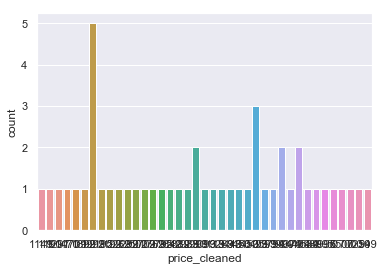

In [17]:
#PLOTS
g = sns.countplot(df.price_cleaned)

#import seaborn as sns
#mport matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.relplot('price_cleaned','price_cleaned',df)

In [16]:
df['price_cleaned']

0     4995
1     3999
2     1999
3     1999
4     1999
5     2199
6     3499
7     3450
8     1999
9     2500
10    2795
11    1999
12    3449
13    1190
14    2709
15    1149
16    6500
17    2999
18    1709
19    3099
20    4899
21    3799
22    7259
23    3499
24    2989
25    3119
26     949
27    3599
28    2269
29    1470
30    4499
31    4379
32    3999
33    2849
34    4589
35    4499
36    2299
37    1297
38    1899
39    3269
40    2999
41    7000
42    3459
43    3499
44    2889
45      50
46    2195
47    2769
Name: price_cleaned, dtype: object

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

In [8]:
df

,Description,HasImage,Image,Link,Price,SecondaryDescription,Type,price_cleaned
0,Lenovo Lenovo ThinkPad X240 20,True,https://i.ebayimg.com/images/g/ImoAAOSwT0pbqcK...,/lenovo-lenovo-thinkpad-x240/id-107981888/,4.995 kr.,,Standard,4995
1,"Lenovo ThinkPad X240, GB ram 8",True,https://i.ebayimg.com/images/g/u-gAAOSwTY9bqY-...,/lenovo-thinkpad-x240-gb-ram/id-107899422/,3.999 kr.,,Standard,3999
2,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/mn8AAOSwZq5bqc8...,/lenovo-lenovo-thinkpad-x240/id-107749836/,1.999 kr.,,Standard,1999
3,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/f1IAAOSwG3Rbqfz...,/lenovo-lenovo-thinkpad-x240/id-107749030/,1.999 kr.,,Standard,1999
4,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/xxUAAOSwC0dbqcv...,/lenovo-lenovo-thinkpad-x240/id-107748960/,1.999 kr.,,Standard,1999
5,Lenovo Lenovo X240 Bærbar PC (,True,https://i.ebayimg.com/images/g/p9cAAOSwoW1bpMH...,/lenovo-lenovo-x240-baerbar-pc/id-107963988/,2.199 kr.,,Standard,2199
6,Lenovo Lenovo Thinkpad X240 12,True,https://i.ebayimg.com/images/g/pVYAAOSwAOxbqcU...,/lenovo-lenovo-thinkpad-x240/id-107853240/,3.499 kr.,,Standard,3499
7,"Lenovo X240, Intel i7 GHz, 8 G",True,https://i.ebayimg.com/images/g/dxMAAOSwBNdbqS~...,/lenovo-x240-intel-i7-ghz-8/id-1048397582/,3.450 kr.,,Standard,3450
8,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/Mq4AAOSwFYZbqfX...,/lenovo-lenovo-thinkpad-x240/id-107749471/,1.999 kr.,,Standard,1999
9,"Lenovo Lenovo x240 uldtrabook,",True,https://i.ebayimg.com/images/g/QI0AAOSwQLRbpnb...,/lenovo-lenovo-x240-uldtrabook/id-1048314699/,2.500 kr.,,Standard,2500


  Found existing installation: seaborn 0.8.1
    Uninstalling seaborn-0.8.1:
      Successfully uninstalled seaborn-0.8.1


In [51]:
df=pd.read_json(r.text)

NameError: name 'r' is not defined

In [102]:
df

,Description,HasImage,Image,Link,Price,SecondaryDescription,Type
0,Lenovo Lenovo Thinkpad X240 12,True,https://i.ebayimg.com/images/g/ooYAAOSwzgJbpbS...,/lenovo-lenovo-thinkpad-x240/id-107853240/,3.499 kr.,,Standard
1,"Lenovo ThinkPad X240 - Brugt,",True,https://i.ebayimg.com/images/g/AVIAAOSwvmRa4el...,/lenovo-thinkpad-x240-brugt/id-106379511/,2.795 kr.,,Standard
2,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/2GIAAOSwX8dbpdP...,/lenovo-lenovo-thinkpad-x240/id-107748960/,1.999 kr.,,Standard
3,Lenovo Lenovo ThinkPad X240 20,True,https://i.ebayimg.com/images/g/s7gAAOSwAm9bpc2...,/lenovo-lenovo-thinkpad-x240/id-107967168/,4.995 kr.,,Standard
4,Lenovo Lenovo X240 Bærbar PC (,True,https://i.ebayimg.com/images/g/p9cAAOSwoW1bpMH...,/lenovo-lenovo-x240-baerbar-pc/id-107963988/,2.199 kr.,,Standard
5,"Lenovo ThinkPad X240, GB ram 8",True,https://i.ebayimg.com/images/g/tLwAAOSwtAlbpd4...,/lenovo-thinkpad-x240-gb-ram/id-107929444/,3.999 kr.,,Standard
6,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/bqMAAOSwusNbkkW...,/lenovo-lenovo-thinkpad-x240/id-107752763/,1.999 kr.,,Standard
7,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/QLAAAOSwb-RbpdW...,/lenovo-lenovo-thinkpad-x240/id-107749836/,1.999 kr.,,Standard
8,"Lenovo Lenovo x240 uldtrabook,",True,https://i.ebayimg.com/images/g/QI0AAOSwQLRbpnb...,/lenovo-lenovo-x240-uldtrabook/id-1048314699/,2.500 kr.,,Standard
9,Lenovo Lenovo ThinkPad X240 12,True,https://i.ebayimg.com/images/g/yW0AAOSwYcBbpek...,/lenovo-lenovo-thinkpad-x240/id-107749030/,1.999 kr.,,Standard
